#Basic imports and function ceil

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller #to see if timeseries is stationary
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import datetime

In [0]:
# Fonction pour majorer ou minorer un nombre à l'entier le plus proche

def my_ceil(predictions):
  for i in range(len(predictions)):
    if predictions[i]%1<=0.5:
      predictions[i] = int(predictions[i])
    else:
      predictions[i] = int(predictions[i]) + 1
  return predictions

In [0]:
import io
from google.colab import files
uploaded = files.upload()

Saving test_input.csv to test_input.csv
Saving train_input.csv to train_input.csv
Saving train_output.csv to train_output.csv


#Dataset Exploration 

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

In [0]:
%%capture
train_input= pd.read_csv('https://raw.githubusercontent.com/nisrineha/Challenge_data_well_being_at_work/master/datasets/train_input.csv')
train_output= pd.read_csv('https://raw.githubusercontent.com/nisrineha/Challenge_data_well_being_at_work/master/datasets/train_output.csv')
train= train_input
train['Score']= train_output.Score
train.head()
for i in range(len(train['Date'])):
  train['Date'][i] = datetime.datetime.strptime(train['Date'][i], '%Y-%m-%d %H:%M:%S')

In [0]:
print(train.shape)
print(train.head())


(8000, 8)
   ID                 Date  Temperature  Humidity  Humex    CO2  Bright  Score
0   0  2017-08-31 23:30:00         22.7      56.0   25.7  534.0     1.0    4.0
1   1  2017-09-01 00:30:00         22.8      55.0   25.7  506.0     1.0    4.0
2   2  2017-09-01 01:30:00         22.9      55.0   25.9  577.0     1.0    4.0
3   3  2017-09-01 02:30:00         23.0      55.0   26.1  630.0     1.0    2.0
4   4  2017-09-01 03:30:00         23.0      55.0   26.1  643.0     1.0    3.0


Verifying if any na value in our dataframe, the result of this query shows us that there is none. 

In [0]:
train.isnull().values.any()

False

##Distribution of different features: 


<Figure size 432x288 with 0 Axes>

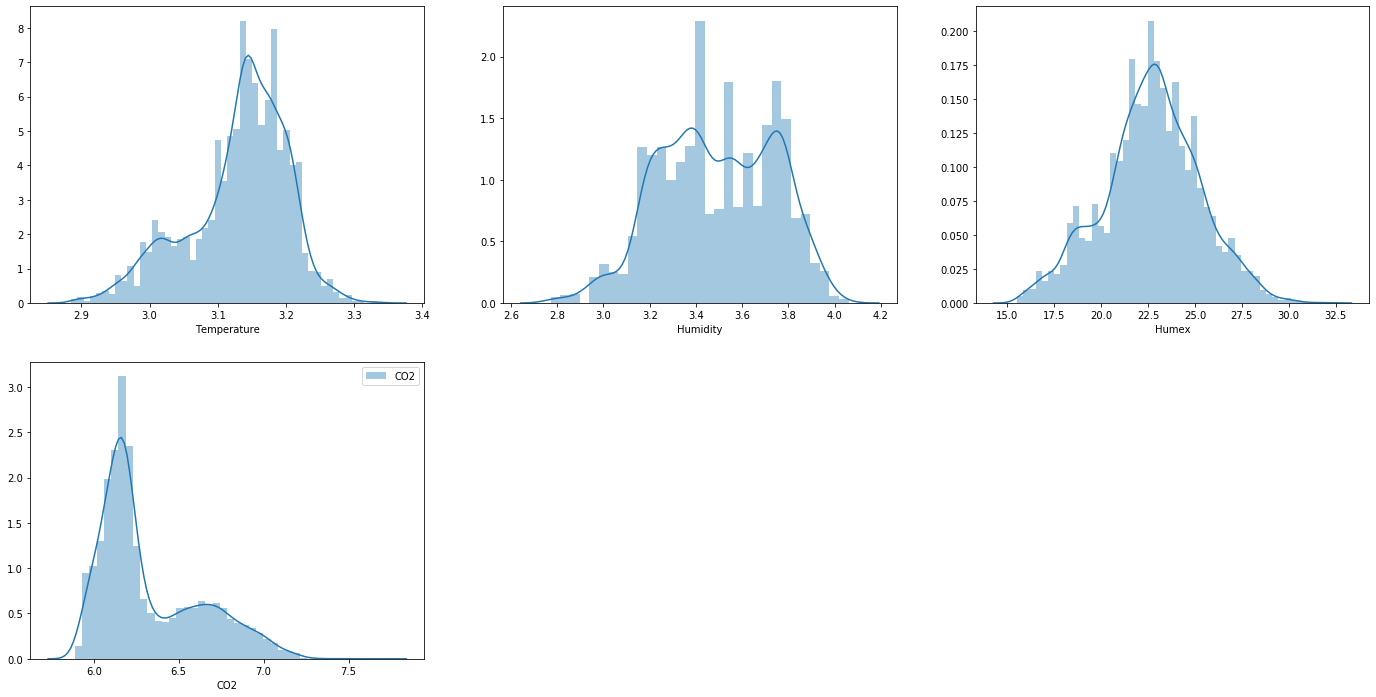

In [0]:
plt.figure("Distribution Plots")
fig = plt.figure(figsize = (24,12))
plt.subplot(2, 3,  1)
sns.distplot(np.log(train.Temperature), label = 'Temperature')
plt.subplot(2, 3, 2)
sns.distplot(np.log(train.Humidity), label = 'Humidity')
plt.subplot(2, 3, 3)
sns.distplot(train.Humex, label = 'Humex')
plt.subplot(2, 3, 4)
sns.distplot(np.log(train.CO2), label = 'CO2')
# sns.distplot(well_BE.month, label = 'month')
plt.legend()
plt.show()

We have the only varibale who has a normal distribution is the Humex variable which represents the air qualtiy 

##Matrice de correlation  

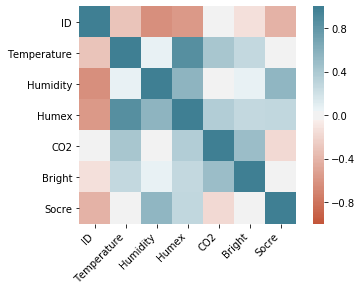

In [0]:
corr = train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [0]:
corr

,ID,Temperature,Humidity,Humex,CO2,Bright,Socre
ID,1.000000,-0.306515,-0.630485,-0.571340,0.006029,-0.131696,-0.416685
Temperature,-0.306515,1.000000,0.071968,0.861334,0.426742,0.275884,0.028900
Humidity,-0.630485,0.071968,1.000000,0.566265,0.015807,0.075624,0.541904
Humex,-0.571340,0.861334,0.566265,1.000000,0.361522,0.268284,0.287406
CO2,0.006029,0.426742,0.015807,0.361522,1.000000,0.486382,-0.172919
Bright,-0.131696,0.275884,0.075624,0.268284,0.486382,1.000000,-0.024523
Socre,-0.416685,0.028900,0.541904,0.287406,-0.172919,-0.024523,1.000000


Again, there is only one variable **Humidty** which is hihgly correlated with our traget variable **score** 

##Relation between our target variable and the variable Date

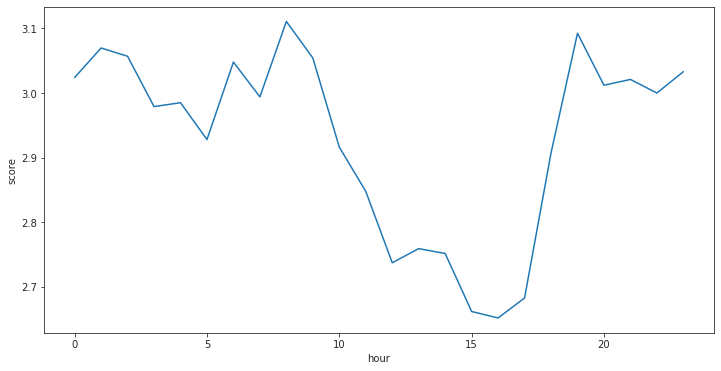

In [0]:
series = pd.Series(np.array(train.Score), index=train.Date)
groupHour = series.groupby(series.index.hour).mean()
groupHour = pd.DataFrame({'hour':groupHour.index, 'score':groupHour.values})

# plt.plot(groupHour.hour, groupHour.score)
fig, ax = plt.subplots(1,1, figsize = (12,6))
#sns.barplot(x = 'hour', y = 'score', data = groupHour)

sns.lineplot(x = 'hour', y = 'score', data = groupHour)
sns.set_style("ticks", {"xtick.major.size": 16, "ytick.major.size": 8})

From the graph before which reprensents the score in function of day hours, the confort subjectif drop at 9:00 Am and raise again at 19:00, maybe people are working at this hours and they are less confortable. 

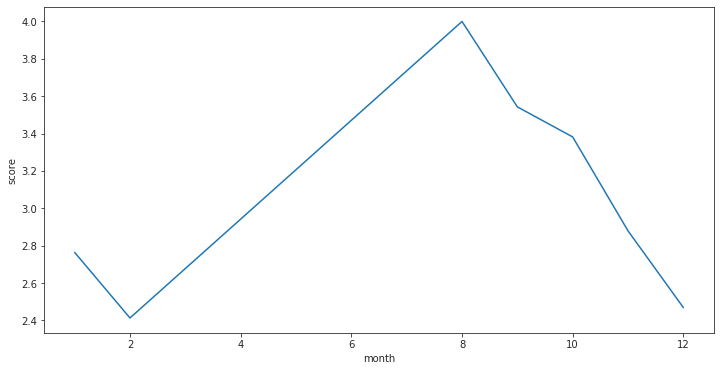

In [0]:
series = pd.Series(np.array(train.Score), index=train.Date)
groupHour = series.groupby(series.index.month).mean()
groupHour = pd.DataFrame({'month':groupHour.index, 'score':groupHour.values})

fig, ax = plt.subplots(1,1, figsize = (12,6))
#sns.barplot(x = 'month', y = 'score', data = groupHour)
sns.lineplot(x = 'month', y = 'score', data = groupHour)

We did a variation of the score in function of months, but it is insignificant, since we have only few months in our dataset 

## Tableau software

In order to have a better idea about our dataset we used the software Tableau

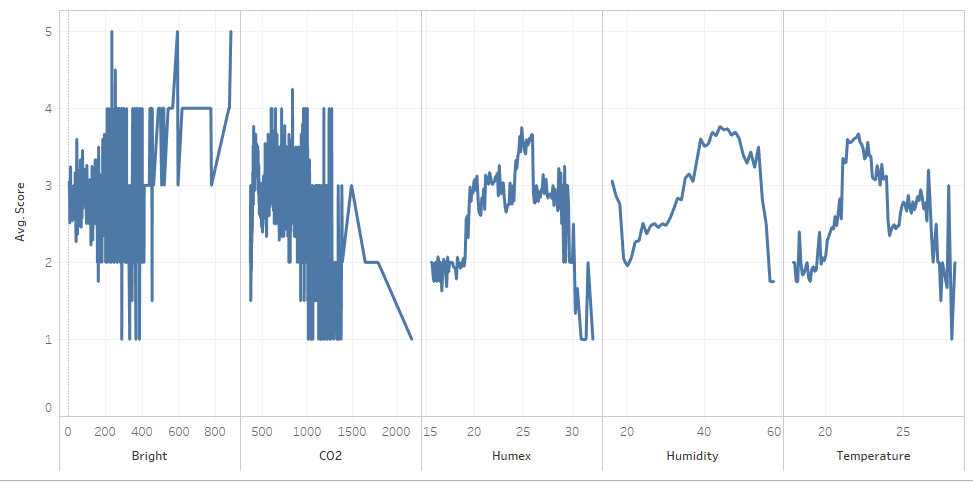

In [0]:
from IPython.core.display import Image, display
display(Image('/content/score(autresvariables).PNG'))

The graph shows us that there is no apprent relation between our traget and features 

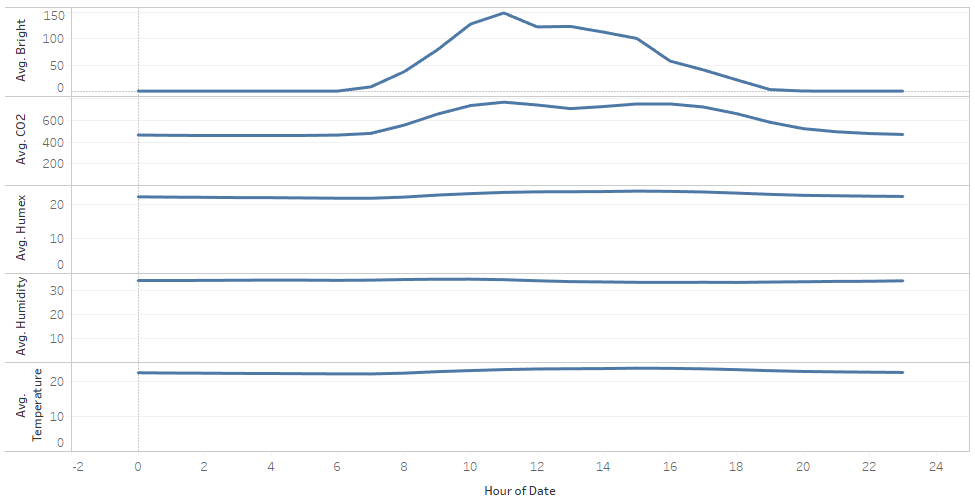

In [0]:
display(Image('/content/variable(hours).PNG'))


The graph shows us that except the bright and CO2, the other features are constant during the day. 

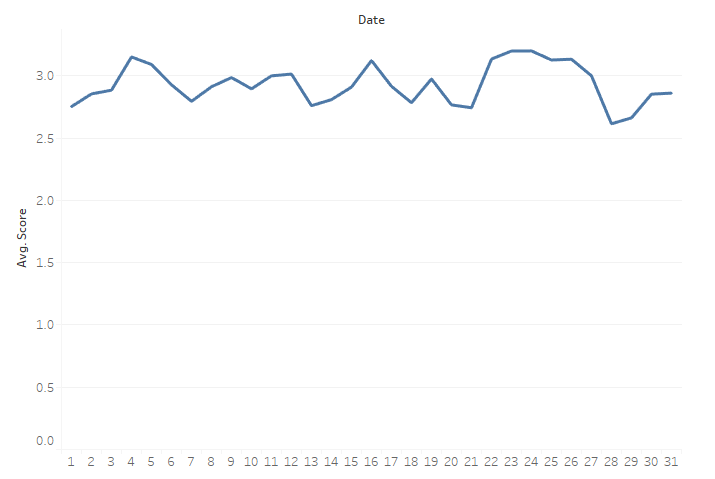

In [0]:
display(Image('/content/score(day).PNG'))


this graph shows us that there is no apparent seasonality concerning the score and the time. 

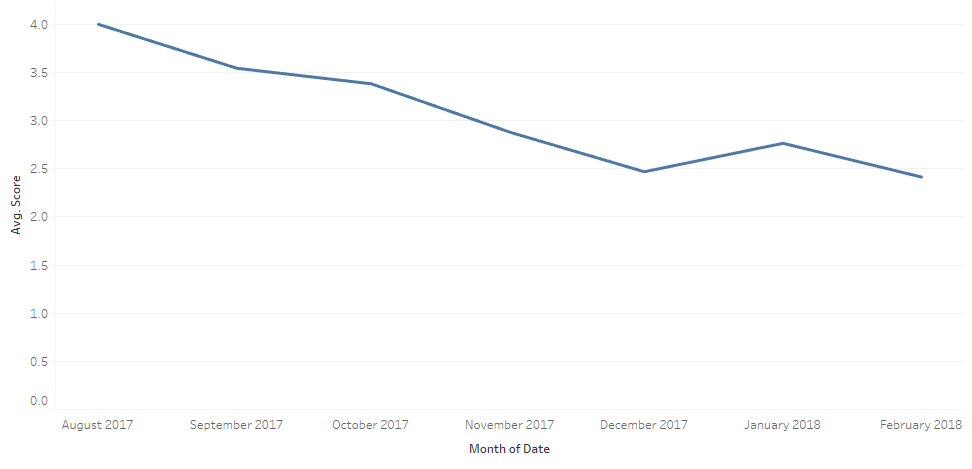

In [0]:
display(Image('/content/score(month).PNG'))

This graph shows us that the score is dropping from August to Decemeber and maybe of the season from summer to winter. 

##Conclusion 

After exploring of our data, in the next section we will preprocess the data for modelisation. 

#Preprocessing phase

##Train data

###Import train data

In [0]:
wellB_in = pd.read_csv(io.BytesIO(uploaded['train_input.csv']))
wellB_out = pd.read_csv(io.BytesIO(uploaded['train_output.csv']))
well_B = wellB_in

# Convert Date column from String to Date
for i in range(len(well_B['Date'])):
  well_B['Date'][i] = datetime.datetime.strptime(well_B['Date'][i], '%Y-%m-%d %H:%M:%S')

train_ID = well_B.ID
train_Date = well_B.Date

well_B = well_B.drop(['ID','Date'], axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


###Add weekdays to columns as dummies

In [0]:
well_B['weekday'] = train_Date

# Add weekday column to data
for i in range(len(well_B.weekday)):
  well_B.weekday[i] = well_B.weekday[i].weekday()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [0]:
dummy_weekday = pd.get_dummies(well_B['weekday'])
dummy_weekday.columns = ['lundi','mardi','mercredi','jeudi','vendredi','samedi','dimanche']

# dummy_weekday.rename(columns = {'0':'lundi','1':'mardi','2':'mercredi','3':'jeudi','4':'vendredi','5':'samedi','6':'dimanche'})
# dummy_weekday.head()

well_B = pd.concat([well_B,dummy_weekday], axis=1)

In [0]:
# Drop Weekday column with categorical values
well_B = well_B.drop('weekday', axis = 1)

###Add hours to columns as dummy variables

In [0]:
well_B['hour'] = train_Date

for i in range(len(well_B.hour)):
  well_B.hour[i] = well_B.hour[i].hour

dummy_hour = pd.get_dummies(well_B['hour'])
dummy_hour.columns = ['midnight','AM1','AM2','AM3','AM4','AM5','AM6','AM7','AM8','AM9','AM10','AM11','midday','PM1','PM2','PM3','PM4','PM5','PM6','PM7','PM8','PM9','PM10','PM11']

well_B = pd.concat([well_B,dummy_hour], axis = 1)

well_B = well_B.drop('hour', axis = 1)


well_B.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Temperature,Humidity,Humex,CO2,Bright,lundi,mardi,mercredi,jeudi,vendredi,samedi,dimanche,midnight,AM1,AM2,AM3,AM4,AM5,AM6,AM7,AM8,AM9,AM10,AM11,midday,PM1,PM2,PM3,PM4,PM5,PM6,PM7,PM8,PM9,PM10,PM11
0,22.7,56.0,25.7,534.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,22.8,55.0,25.7,506.0,1.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,22.9,55.0,25.9,577.0,1.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,23.0,55.0,26.1,630.0,1.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,23.0,55.0,26.1,643.0,1.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Add objective variable to data
well_B['Score'] = wellB_out.Score

##Test Data

###Import test data

In [0]:
well_Btest = pd.read_csv(io.BytesIO(uploaded['test_input.csv']))

# Convert Date column from String to Date
for i in range(len(well_Btest['Date'])):
  well_Btest['Date'][i] = datetime.datetime.strptime(well_Btest['Date'][i], '%Y-%m-%d %H:%M:%S')

test_ID = well_Btest.ID
test_Date = well_Btest.Date

well_Btest = well_Btest.drop(['ID','Date'], axis = 1)
# well_Btest_ = well_Btest

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


###Add weekdays to columns as dummies

In [0]:
well_Btest['weekday'] = test_Date

# Add weekday column to data
for i in range(len(well_Btest.weekday)):
  well_Btest.weekday[i] = well_Btest.weekday[i].weekday()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [0]:
dummy_weekday = pd.get_dummies(well_Btest['weekday'])
dummy_weekday.columns = ['lundi','mardi','mercredi','jeudi','vendredi','samedi','dimanche']

# dummy_weekday.rename(columns = {'0':'lundi','1':'mardi','2':'mercredi','3':'jeudi','4':'vendredi','5':'samedi','6':'dimanche'})
# dummy_weekday.head()

well_Btest = pd.concat([well_Btest,dummy_weekday], axis=1)

In [0]:
# Drop Weekday column with categorical values
well_Btest = well_Btest.drop('weekday', axis = 1)

###Add hours to columns as dummy variables

In [0]:
well_Btest['hour'] = test_Date

for i in range(len(well_Btest.hour)):
  well_Btest.hour[i] = well_Btest.hour[i].hour

dummy_hour = pd.get_dummies(well_Btest['hour'])
dummy_hour.columns = ['midnight','AM1','AM2','AM3','AM4','AM5','AM6','AM7','AM8','AM9','AM10','AM11','midday','PM1','PM2','PM3','PM4','PM5','PM6','PM7','PM8','PM9','PM10','PM11']

well_Btest = pd.concat([well_Btest,dummy_hour], axis = 1)

well_Btest = well_Btest.drop('hour', axis = 1)

well_Btest.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Temperature,Humidity,Humex,CO2,Bright,lundi,mardi,mercredi,jeudi,vendredi,samedi,dimanche,midnight,AM1,AM2,AM3,AM4,AM5,AM6,AM7,AM8,AM9,AM10,AM11,midday,PM1,PM2,PM3,PM4,PM5,PM6,PM7,PM8,PM9,PM10,PM11
0,20.1,26.0,17.9,377.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,20.2,26.0,18.0,374.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,20.1,26.0,17.9,379.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,20.1,26.0,17.9,380.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,20.0,26.0,17.8,379.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


#K-fold Cross validation: regression and classification

##Imports and functions

In [0]:
from sklearn.model_selection import KFold # import KFold
from sklearn.metrics import accuracy_score #To calculate accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [0]:
kf = KFold(n_splits = 7)

In [0]:
def cross_validation_XG_classifier(model):
  accuracy = []
  for train_index, test_index in kf.split(well_B):
    # print("TRAIN:", train_index, "TEST:", test_index)
    #train part
    X_train = np.array(well_B.drop('Score', axis = 1))[train_index]
    y_train = np.array(well_B.Score)[train_index]
    #test part
    X_test = np.array(well_B.drop('Score', axis = 1))[test_index]
    y_test = np.array(well_B.Score)[test_index]

    # Define the scaler 
    # scaler = StandardScaler().fit(X_train)

    # X_train = scaler.transform(X_train)
    # X_test = scaler.transform(X_test)

    # rgr_time = RandomForestClassifier(n_estimators = 400, random_state = 0, max_depth=20)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    y_pred = my_ceil(np.array(y_pred))

    accuracy.append(accuracy_score(y_pred, y_test))
    # print("The score of the " + str(cpt) + " is " + str(accuracy_score(y_pred, y_test)))
    # cpt = cpt+1

  return np.average(accuracy)

# Converts floats to integers for classification
def my_ceil(predictions):
  for i in range(len(predictions)):

    if predictions[i]%1 <= +0.5:
      predictions[i] = int(predictions[i])
    else:
      predictions[i] = int(predictions[i]) + 1
  return predictions


def cross_validation_Lregressor(formula):
  accuracy = []
  for train_index, test_index in kf.split(well_B):
    # print("TRAIN:", train_index, "TEST:", test_index)
    #train part
    train = well_B.iloc[train_index]
    #test part
    test = well_B.iloc[test_index]

    # Define the scaler 
    # scaler = StandardScaler().fit(X_train)

    # X_train = scaler.transform(X_train)
    # X_test = scaler.transform(X_test)

    model_lr = formula
    result_lr = smf.ols(model_lr, data = train).fit()

    y_pred = np.array(result_lr.predict(test))

    y_pred = my_ceil(y_pred)
    
    accuracy.append(accuracy_score(y_pred, test.Score))
    # print("The score of the " + str(cpt) + " is " + str(accuracy_score(y_pred, y_test)))
    # cpt = cpt+1

  return np.average(accuracy)


##Regression

###Linear regression

In [0]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

####First model

In [0]:
model_lr = 'Score ~ Temperature + Humidity + Humex + CO2 + Bright'
result_lr = smf.ols(model_lr, data = well_B).fit()
print(result_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     979.6
Date:                Thu, 19 Dec 2019   Prob (F-statistic):               0.00
Time:                        18:09:19   Log-Likelihood:                -8541.0
No. Observations:                8000   AIC:                         1.709e+04
Df Residuals:                    7994   BIC:                         1.714e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -18.7846      0.790    -23.779      

In [0]:
cross_validation_Lregressor(model_lr)

0.5186297859877849

####Second model

In [0]:
model_lr_1 = 'Score ~ Temperature + Humidity + Humex + CO2 + Bright + lundi +	mardi + mercredi + jeudi + vendredi + samedi + dimanche'
result_lr_1 = smf.ols(model_lr_1, data = well_B).fit()
print(result_lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     456.1
Date:                Thu, 19 Dec 2019   Prob (F-statistic):               0.00
Time:                        18:09:27   Log-Likelihood:                -8503.0
No. Observations:                8000   AIC:                         1.703e+04
Df Residuals:                    7988   BIC:                         1.711e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -16.2137      0.691    -23.456      

In [0]:
cross_validation_Lregressor(model_lr_1)

0.5176292543116874

####Third model

In [0]:
allcolumns = '+'.join(well_B.columns[:len(well_B.columns)-1])
allcolumns
model_lr_2 = 'Score ~'+ allcolumns
model_lr_2
result_lr_2 = smf.ols(model_lr_2, data = well_B).fit()
print(result_lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     151.9
Date:                Thu, 19 Dec 2019   Prob (F-statistic):               0.00
Time:                        18:22:00   Log-Likelihood:                -8452.9
No. Observations:                8000   AIC:                         1.698e+04
Df Residuals:                    7965   BIC:                         1.722e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -15.5752      0.665    -23.410      

In [0]:
cross_validation_Lregressor(model_lr_2)

0.5175061304727452

###XGboost

In [0]:
import xgboost

In [0]:
model_xg = xgboost.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.05,
                          alpha = 10,base_score= 0.4, booster='gbtree', n_estimators = 150)

In [0]:
cross_validation_XG_classifier(model_xg)

0.7156269433045913

##Classification

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab import files 

In [0]:
def my_ceil(predictions):
  for i in range(len(predictions)):
    if predictions[i]%1<=0.5:
      predictions[i] = int(predictions[i])
    else:
      predictions[i] = int(predictions[i]) + 1
  return predictions

#Export function 
def export( data_test, predictions):
  result_ = pd.DataFrame({'ID': data_test.ID, 'Score': my_ceil(predictions)}) 
  result_.to_csv('results_.csv', index = False) 
  
  files.download('results_.csv')


# Upload preprocessed dataset train and test  

In [0]:
test = pd.read_csv('https://raw.githubusercontent.com/nisrineha/Challenge_data_well_being_at_work/master/datasets/data_test_processed.csv')
train = pd.read_csv('https://raw.githubusercontent.com/nisrineha/Challenge_data_well_being_at_work/master/datasets/data_train_processed.csv')
test_with_ID = pd.read_csv('https://raw.githubusercontent.com/nisrineha/Challenge_data_well_being_at_work/master/datasets/test_input.csv')
test_with_date= pd.read_csv('https://raw.githubusercontent.com/nisrineha/Challenge_data_well_being_at_work/master/datasets/train_input.csv')

In [0]:
test_with_date.head()


,ID,Date,Temperature,Humidity,Humex,CO2,Bright
0,0,2017-08-31 23:30:00,22.7,56.0,25.7,534.0,1.0
1,1,2017-09-01 00:30:00,22.8,55.0,25.7,506.0,1.0
2,2,2017-09-01 01:30:00,22.9,55.0,25.9,577.0,1.0
3,3,2017-09-01 02:30:00,23.0,55.0,26.1,630.0,1.0
4,4,2017-09-01 03:30:00,23.0,55.0,26.1,643.0,1.0


Creation of features and the target variable Score

In [0]:
y= train['Score']
train1= train
train1= train1.drop('Score', axis= 1)
X= train1
train1.head()

Spliting of the data 

In [0]:
X_train, X_test, y_train, y_test= train_test_split(X, y , test_size= 0.2, random_state= 42)

##Pipeline method

Implement of pipeline method using different transformer: numeric and categorial 

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#SimpleImputer fill any missing values 
#Scaler numeric transformer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

#One hot encoder to transform categorial values into integers.

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

Transform the categorical features and numeric on train dataset and test 

In [0]:
#Select les columns numeric 
#Select les columns categoric 


integer_features = list(X.columns[X.dtypes == 'int64'])
continuous_features = list(X.columns[X.dtypes == 'float64'])
categorical_features = list(X.columns[X.dtypes == 'object'])
numeric_features = integer_features + continuous_features 


from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

integer_features_test = list(test.columns[test.dtypes == 'int64'])
continuous_features_test = list(test.columns[test.dtypes == 'float64'])
categorical_features_test = list(test.columns[test.dtypes == 'object'])
numeric_features = integer_features + continuous_features 


from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

##Model selection
In this section, we chose different classifier from sklearn, to get the best classifier for our dataset, we calculate the score thanks to the splitting of the dataset that we did before. 

In [0]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(), 
    LinearDiscriminantAnalysis(), 
    QuadraticDiscriminantAnalysis()
    ]
pipes= []
for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train)  
    pipes.append(pipe) 
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
model score: 0.587
SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
model score: 0.439
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
model score: 0.601
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
model score: 0.565
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
model score: 0.750
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


From the results above, we observe that the best classifiers are **GradientBoostingClassifier** and  **RandomForestClassifier**

we chose GradientBoostingClassifier for submission, we had our best score which is **0,6990**




In [0]:
x = test
y_pred= pipes[-3].predict(x)
export(test_with_ID, y_pred)

## Using pipeline in GridSearch 

In [0]:
param_grid = { 
    'classifier__n_estimators': [ 200, 300,  400, 500],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth' : [10, 20, 25, 30],
    'classifier__criterion' :['gini', 'entropy']}
from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(rf, param_grid, n_jobs= 1)
                  
CV.fit(X_train, y_train)  
print(CV.best_params_)    
print(CV.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__max_features': 'auto', 'classifier__n_estimators': 400}
0.71359375


we had from our grid search our best max depth and number of estimators for our randomforset model. 

In [0]:
#Fitting the classifier 
from sklearn.ensemble import RandomForestClassifier
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators= 400, max_depth=20))])

In [0]:
rf.fit(X_train, y_train )

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                  ('classifier',RandomForestClassifier(n_estimators= 400, max_depth=20) )])
pipe.fit(X_train, y_train)  
print(classifier)
print("model score: %.3f" % pipe.score(X_test, y_test))
x = test
y_pred= pipe.predict(x)
export(test_with_ID, y_pred)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
model score: 0.734


We submitted our results, but we had a score less than the one when we implemented **GradientBoostingClassifier**

###Random forest model

In [0]:
rf_time = RandomForestClassifier(n_estimators = 400, random_state = 0, max_depth=20)

In [0]:
cross_validation_XG_classifier(rf_time)

0.706623909314313

###K nearest neighbor

In [0]:
neigh_time = KNeighborsClassifier(n_neighbors=5)

In [0]:
cross_validation_XG_classifier(neigh_time)

0.48610790989129854

###Gradient Boosting Classification

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
gbC_time = GradientBoostingClassifier()

In [0]:
cross_validation_XG_classifier(gbC_time)

0.6976108065300944

#Stacking

In [0]:
from sklearn.ensemble import ExtraTreesClassifier

In [0]:
models = [
    GradientBoostingClassifier(learning_rate = 0.1),
        
    RandomForestClassifier(random_state=0, n_jobs=-1, 
                           n_estimators=200, max_depth=20),
        
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate = 0.1,
                  n_estimators=70, max_depth=4),
    
    ExtraTreesClassifier(n_jobs= 16,n_estimators= 350,max_features= 0.9,max_depth= 12,min_samples_leaf= 2)
    
    
]

In [0]:
S_train, S_test = stacking(models,                   
                           X, y, test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [5]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [GradientBoostingClassifier]
    fold  0:  [0.72483221]
    fold  1:  [0.73553719]
    fold  2:  [0.73254009]
    fold  3:  [0.73809524]
    ----
    MEAN:     [0.73275118] + [0.00497683]
    FULL:     [0.73274748]

model  1:     [RandomForestClassifier]
    fold  0:  [0.70366546]
    fold  1:  [0.70454545]
    fold  2:  [0.70822556]
    fold  3:  [0.71221532]
    ----
    MEAN:     [0.70716295] + [0.00338154]
    FULL:     [0.70715947]

model  2:     [XGBClassifier]
    fold  0:  [0.73205989]
    fold  1:  [0.73398760]
    fold  2:  [0.73874806]
    fold  3:  [0.74430642]
    ----
    MEAN:     [0.73727549] + [0.00473326]
    FULL:     [0.73727061]

model  3:     [ExtraTreesClassifier]
    fold  0:  [0.71863707]
    fold  1:  [0.72365702]
    fold  2:  [0.72788412]
    fold  3:  [0.73861284]
    ----
    MEAN:     [0.72719776] + [0.00735862]
   

In [0]:
model =  XGBClassifier(random_state=0, n_jobs=-1, learning_rate = 0.1,
                  n_estimators=70, max_depth=4)
    
model = model.fit(S_train, y)
y_pred = model.predict(S_test)

In [0]:
results_stack2 = pd.DataFrame({'ID':test_ID, 'Score': y_pred}) 
results_stack2.to_csv('results_stack3.csv', index = False) 
from google.colab import files 
files.download('results_stack3.csv')

##Basic deep learning model

In [0]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='softmax', input_shape=(36,)))

# Add one hidden layer 
model.add(Dense(12, activation='relu'))

# # Add one hidden layer 
# model.add(Dense(12, activation='relu'))

# Add an output layer 
model.add(Dense(output_dim = 5, activation = 'softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5)`


In [0]:
def dummies_categ(y):
  cat = []
  for i in range(len(y)):
    ind = np.argmax(y_pred[i]) + 1
    cat.append(ind)
  return cat

In [0]:
accuracy = []
for train_index, test_index in kf.split(well_B):
  # print("TRAIN:", train_index, "TEST:", test_index)
  #train part
  X_train = np.array(well_B.drop('Score', axis = 1))[train_index]
  y_train = np.array(well_B.Score)[train_index]

  y_train = pd.get_dummies(y_train)
  #test part
  X_test = np.array(well_B.drop('Score', axis = 1))[test_index]
  y_test = np.array(well_B.Score)[test_index]

  y_test = pd.get_dummies(y_test)

  
  # Define the scaler 
  scaler = StandardScaler().fit(X_train)

  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
                    
  model.fit(X_train, y_train,epochs=2, batch_size=1, verbose=1)

  y_pred = model.predict(X_test)

  y_pred = dummies_categ(y_pred)
  y_test = np.array(well_B.Score)[test_index]
  # print(y_pred)
  accuracy.append(accuracy_score(y_pred, y_test))
  # print("The score of the " + str(cpt) + " is " + str(accuracy_score(y_pred, y_test)))
  # cpt = cpt+1

np.average(accuracy)

Epoch 1/2
6857/6857 [==============================] - 12s 2ms/step - loss: 0.5317 - acc: 0.8609
Epoch 2/2
6857/6857 [==============================] - 11s 2ms/step - loss: 0.5344 - acc: 0.8626
Epoch 1/2
6857/6857 [==============================] - 12s 2ms/step - loss: 0.5495 - acc: 0.8596
Epoch 2/2
6857/6857 [==============================] - 10s 2ms/step - loss: 0.5380 - acc: 0.8617
Epoch 1/2
6857/6857 [==============================] - 12s 2ms/step - loss: 0.5503 - acc: 0.8602
Epoch 2/2
6857/6857 [==============================] - 11s 2ms/step - loss: 0.5311 - acc: 0.8629
Epoch 1/2
6857/6857 [==============================] - 12s 2ms/step - loss: 0.5359 - acc: 0.8615
Epoch 2/2
6857/6857 [==============================] - 11s 2ms/step - loss: 0.5310 - acc: 0.8646
Epoch 1/2
6857/6857 [==============================] - 13s 2ms/step - loss: 0.5457 - acc: 0.8645
Epoch 2/2
6857/6857 [==============================] - 11s 2ms/step - loss: 0.5314 - acc: 0.8665
Epoch 1/2
6857/6857 [=========

0.6390032025331335